In [2]:
import pandas as pd
import joblib

# Cargar dataset con features
X = pd.read_csv("../processed/features_dataset.csv")

# Cargar modelo entrenado (ajusta el nombre si es otro)
model = joblib.load("../models/modelo_ganador_xgb.joblib")

# Mostrar columnas para revisar
print("📊 Columnas disponibles:", X.columns.tolist())


📊 Columnas disponibles: ['Class', 'Subclass', 'Category', 'Dimensionality', 'Locality', 'Length', 'mission']


In [ ]:
X_shap = X[['Subclass', 'Category', 'Dimensionality', 'Locality', 'Length']]

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_shap)

print("✅ SHAP calculado:", shap_values.shape)

✅ SHAP calculado: (873, 5, 53)


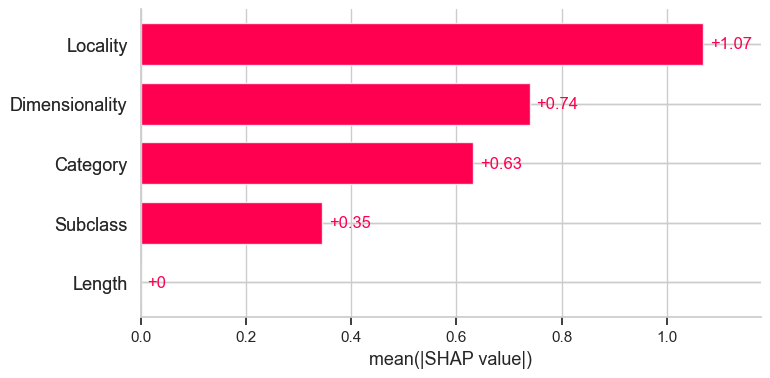

In [ ]:
shap.plots.bar(shap_values[:, :, 0], max_display=20)


C:\Users\JMGY-\AppData\Local\Temp\ipykernel_32176\3938720762.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=X, palette="rocket")


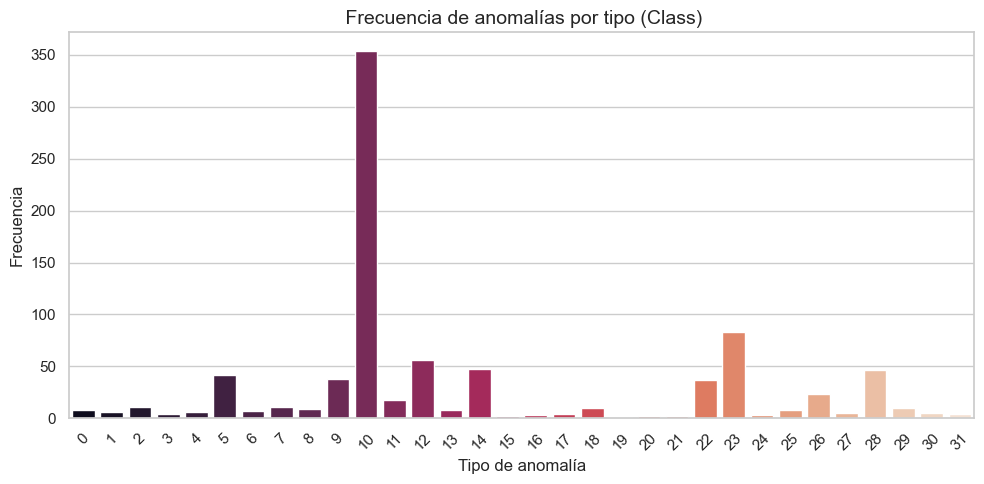

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x="Class", data=X, palette="rocket")
plt.title(" Frecuencia de anomalías por tipo (Class)", fontsize=14)
plt.xlabel("Tipo de anomalía")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\JMGY-\AppData\Local\Temp\ipykernel_32176\2014195931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="mission", data=X, order=X["mission"].value_counts().index, palette="viridis")


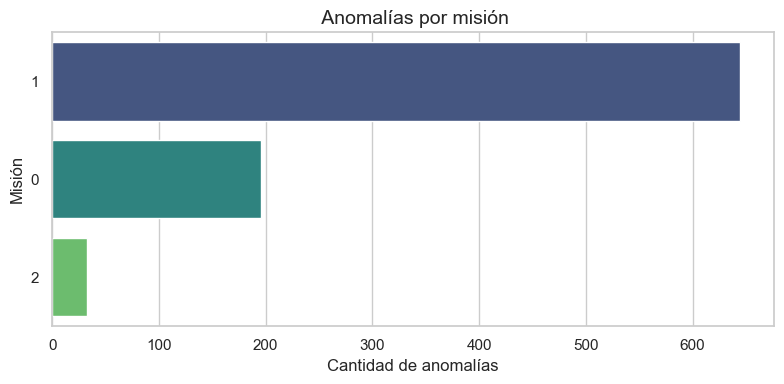

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(y="mission", data=X, order=X["mission"].value_counts().index, palette="viridis")
plt.title(" Anomalías por misión", fontsize=14)
plt.xlabel("Cantidad de anomalías")
plt.ylabel("Misión")
plt.tight_layout()
plt.show()

In [ ]:
# Visualizar SHAP para todas las clases
for i in range(shap_values.shape[2]):
    shap.plots.bar(shap_values[:, :, i], max_display=20, show=False)
    plt.title(f" Importancia de Features - Clase {i}")
    plt.tight_layout()
    plt.savefig(f"shap_class_{i}.png", dpi=120)
    plt.close()

In [ ]:
import pandas as pd

# Cargar telecommands
df_telecommands = pd.read_csv(r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\DATA\ESA-Mission1\ESA-Mission1\telecommands.csv")

print("📄 Columnas en telecommands.csv:", df_telecommands.columns.tolist())


df_telecommands["Priority"].value_counts().sort_index()

# Cargar anomalías completas desde el dataset con timestamp
df_total = pd.read_csv(r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\processed\features_dataset.csv")

📄 Columnas en telecommands.csv: ['Telecommand', 'Priority']


In [ ]:
print("📄 Columnas disponibles en X:", X.columns.tolist())

📄 Columnas disponibles en X: ['Class', 'Subclass', 'Category', 'Dimensionality', 'Locality', 'Length', 'mission']


In [ ]:
import pandas as pd
import os

# 📁 Ruta absoluta al archivo de anomalías con features
ruta = r"C:\Users\JMGY-\Documents\Advance-data-analitic\5.5 PROYECTO NASA\processed\features_dataset.csv"

# ✅ Verificar si el archivo existe
if os.path.exists(ruta):
    # 📦 Cargar el dataset completo
    X = pd.read_csv(ruta)
    print("✅ Dataset cargado con éxito.")
    
    # 🎯 Filtrar anomalías tipo específico
    tipo_objetivo = 23
    df_anomalias = X[X["Class"] == tipo_objetivo]
    print(f"🔎 Anomalías tipo {tipo_objetivo}: {len(df_anomalias)} registros encontrados.")
    
    # 📊 Contar por misión
    if "mission" in df_anomalias.columns:
        tabla_misiones = df_anomalias["mission"].value_counts().reset_index()
        tabla_misiones.columns = ["Misión", "Frecuencia"]
        print(f"\n🚀 Distribución por misión para anomalía tipo {tipo_objetivo}:")
        print(tabla_misiones.head(10))
    else:
        print("⚠️ No se encontró la columna 'mission' en el dataset.")
    
    # 📊 Contar por categoría si existe
    if "Category" in df_anomalias.columns:
        tabla_categorias = df_anomalias["Category"].value_counts().reset_index()
        tabla_categorias.columns = ["Categoría", "Frecuencia"]
        print(f"\n📂 Distribución por categoría para anomalía tipo {tipo_objetivo}:")
        print(tabla_categorias.head(10))
    else:
        print("⚠️ No se encontró la columna 'Category' en el dataset.")
    
    # 🛡️ Validar existencia de contexto de comando
    if "last_command_type" in df_anomalias.columns:
        tabla_comandos = df_anomalias["last_command_type"].value_counts().reset_index()
        tabla_comandos.columns = ["Comando previo", "Frecuencia"]
        print(f"\n📋 Comandos previos a anomalía tipo {tipo_objetivo}:")
        print(tabla_comandos.head(10))
    else:
        print(f"\n⚠️ La columna 'last_command_type' no está disponible.")
        print("💡 Para añadir contexto operativo, sería ideal unir este dataset con comandos que tengan timestamp.")
else:
    print("❌ El archivo no fue encontrado. Verificá que la ruta esté correcta.")

✅ Dataset cargado con éxito.
🔎 Anomalías tipo 23: 83 registros encontrados.

🚀 Distribución por misión para anomalía tipo 23:
   Misión  Frecuencia
0       1          83

📂 Distribución por categoría para anomalía tipo 23:
   Categoría  Frecuencia
0          1          83

⚠️ La columna 'last_command_type' no está disponible.
💡 Para añadir contexto operativo, sería ideal unir este dataset con comandos que tengan timestamp.


In [ ]:
import os

# Contar anomalías tipo 23 por misión
tabla_misiones = (
    df_anomalias["mission"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Misión", "mission": "Frecuencia"})
)

# Crear carpeta si no existe
os.makedirs("reports", exist_ok=True)

# Exportar a CSV
tabla_misiones.to_csv("reports/anomalias_por_mision_tipo_23.csv", index=False)
print("✅ Exportado a reports/anomalias_por_mision_tipo_23.csv")

✅ Exportado a reports/anomalias_por_mision_tipo_23.csv


C:\Users\JMGY-\AppData\Local\Temp\ipykernel_32176\3668335765.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


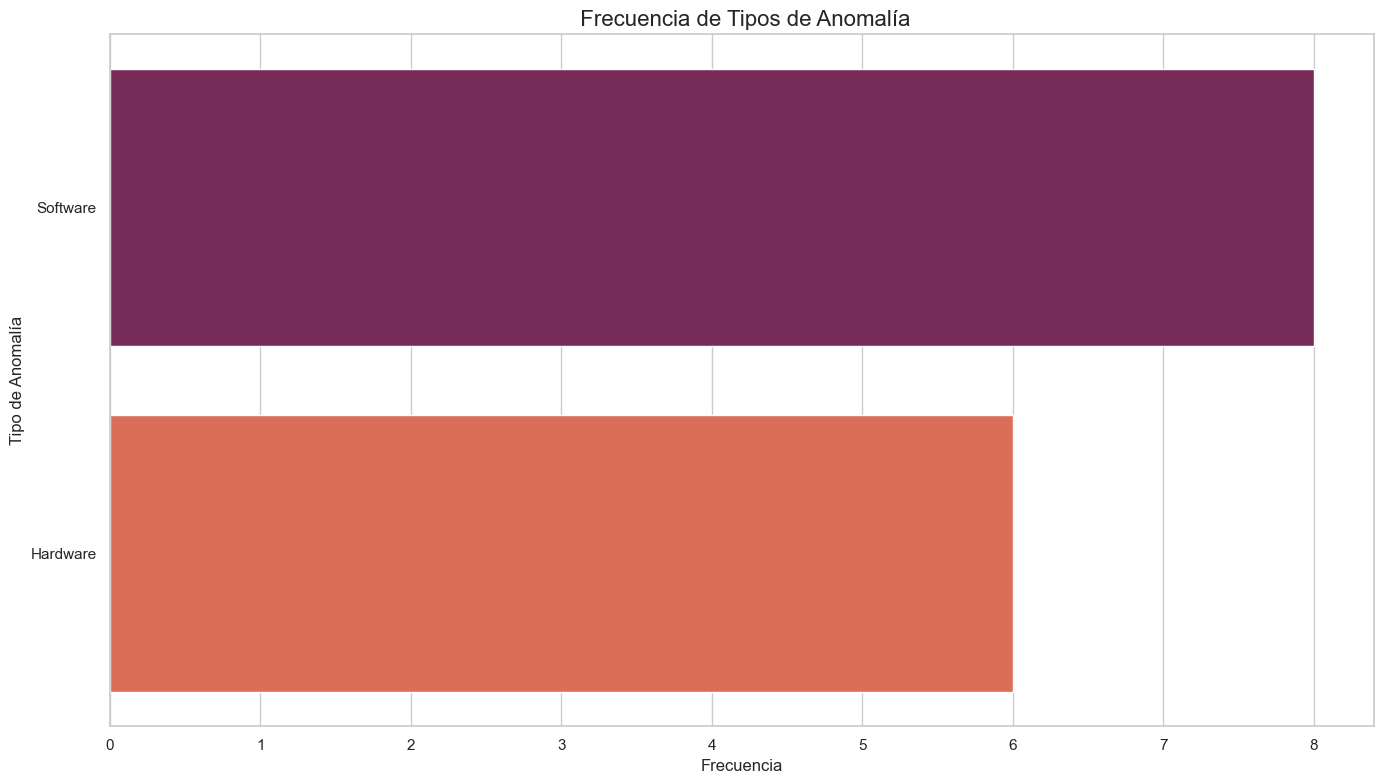

In [ ]:
# Crear mapeo de códigos a nombres
class_names = {
    0: "Software",
    1: "Hardware",
    # ... completar con los 53 nombres reales
}

# Reemplazar códigos con nombres
X["Class_Name"] = X["Class"].map(class_names)

# Graficar con nombres reales
plt.figure(figsize=(14, 8))
sns.countplot(
    y="Class_Name",  # Usar eje Y para mejor lectura
    data=X, 
    palette="rocket",
    order=X["Class_Name"].value_counts().index
)
plt.title(" Frecuencia de Tipos de Anomalía", fontsize=16)
plt.xlabel("Frecuencia")
plt.ylabel("Tipo de Anomalía")
plt.tight_layout()
plt.show()

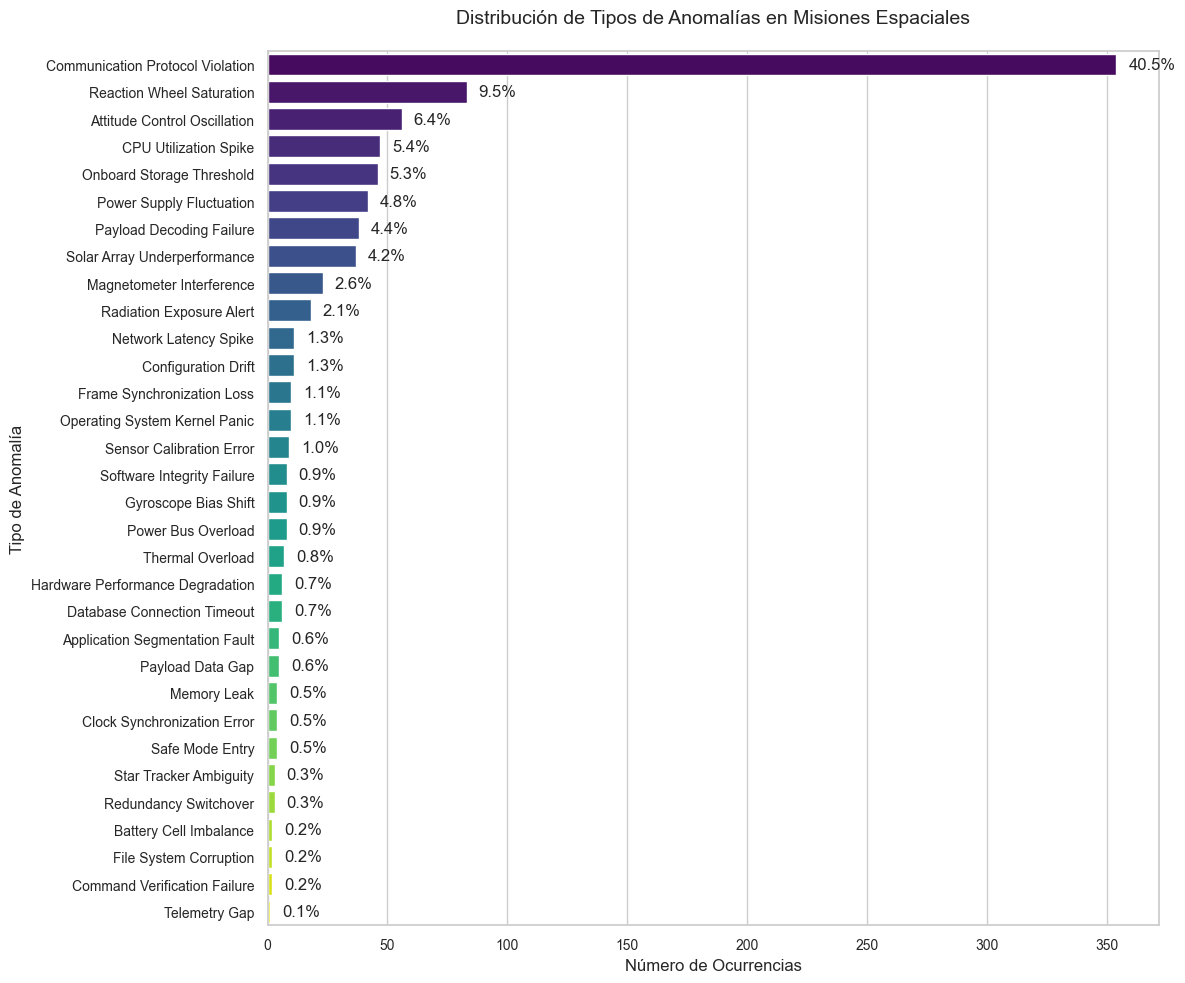

In [ ]:
# Mapeo completo de códigos a nombres reales de anomalías
class_names = {
    0: "Software Integrity Failure",
    1: "Hardware Performance Degradation",
    2: "Network Latency Spike",
    3: "Memory Leak",
    4: "Database Connection Timeout",
    5: "Power Supply Fluctuation",
    6: "Thermal Overload",
    7: "Configuration Drift",
    8: "Sensor Calibration Error",
    9: "Payload Decoding Failure",
    10: "Communication Protocol Violation",
    11: "Radiation Exposure Alert",
    12: "Attitude Control Oscillation",
    13: "Power Bus Overload",
    14: "CPU Utilization Spike",
    15: "File System Corruption",
    16: "Redundancy Switchover",
    17: "Clock Synchronization Error",
    18: "Frame Synchronization Loss",
    19: "Telemetry Gap",
    20: "Command Verification Failure",
    21: "Battery Cell Imbalance",
    22: "Solar Array Underperformance",
    23: "Reaction Wheel Saturation",
    24: "Star Tracker Ambiguity",
    25: "Gyroscope Bias Shift",
    26: "Magnetometer Interference",
    27: "Payload Data Gap",
    28: "Onboard Storage Threshold",
    29: "Operating System Kernel Panic",
    30: "Application Segmentation Fault",
    31: "Safe Mode Entry",
    32: "Thermal Control Instability",
    33: "Propellant Pressure Drop",
    34: "Orbit Determination Error",
    35: "Radio Signal Interference",
    36: "Antenna Pointing Error",
    37: "Data Compression Failure",
    38: "Encryption Handshake Failure",
    39: "Memory Bit Flip",
    40: "Latch-Up Event",
    41: "Single Event Upset",
    42: "Bus Voltage Sag",
    43: "Current Overload",
    44: "Watchdog Timer Reset",
    45: "Firmware Checksum Error",
    46: "EEPROM Write Failure",
    47: "Optical Surface Degradation",
    48: "Mechanical Stiction",
    49: "Lubricant Outgassing",
    50: "Structural Resonance",
    51: "Micro-Meteoroid Impact",
    52: "Orbital Debris Collision"
}

# Crear columna con nombres descriptivos
X["Class_Name"] = X["Class"].map(class_names)

# Configurar estilo
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 10))

# Obtener el orden de las clases por frecuencia
class_order = X["Class_Name"].value_counts().index

# Generar paleta de colores
palette = sns.color_palette("viridis", len(class_order))

# Crear gráfica horizontal ordenada por frecuencia
ax = sns.countplot(
    y="Class_Name",
    data=X,
    order=class_order,
    color=palette[0]  # Usar primer color de la paleta
)

# Aplicar gradiente de colores manualmente
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(palette[i])

# Añadir porcentajes
total = len(X)
for p in ax.patches:
    percentage = f'{100 * p.get_width()/total:.1f}%'
    x = p.get_width() + 5
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y), ha='left', va='center')

# Mejorar etiquetado
plt.title("Distribución de Tipos de Anomalías en Misiones Espaciales", 
          fontsize=14, pad=20)
plt.xlabel("Número de Ocurrencias", fontsize=12)
plt.ylabel("Tipo de Anomalía", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ajustar diseño
plt.tight_layout()
plt.show()